# Simple Linear Regression with Python

## Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Visualize dataset

In [2]:
# load data as dataframe
df = pd.read_csv('./student_scores.csv')

In [3]:
# show the first n rows
df.head(n=10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# data shape
print('Shape: ', df.shape)

Shape:  (25, 2)


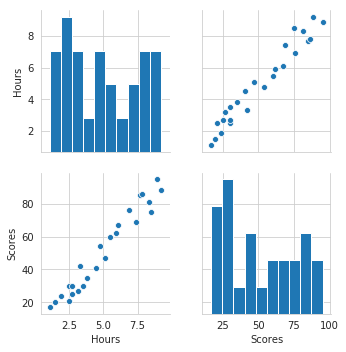

In [6]:
# plot pairwise relationships in a dataset
sns.pairplot(df);

## Split data

In [7]:
# X: Hours, y: Scoures
# convert dataframe to array
X = np.array(df['Hours']).reshape(-1, 1)
y = np.array(df['Scores']).reshape(-1, 1)

In [8]:
# split data with library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# split data without library
"""
Training: 15, Testing: 10
X_train = np.array(X[:15]).reshape(-1, 1)
y_train = np.array(y[:15]).reshape(-1, 1)
X_test = np.array(X[15:]).reshape(-1, 1)
y_test = np.array(y[15:]).reshape(-1, 1)
"""

'\nTraining: 15, Testing: 10\nX_train = np.array(X[:15]).reshape(-1, 1)\ny_train = np.array(y[:15]).reshape(-1, 1)\nX_test = np.array(X[15:]).reshape(-1, 1)\ny_test = np.array(y[15:]).reshape(-1, 1)\n'

In [9]:
print(X_train.shape)
print(X_test.shape)

(15, 1)
(10, 1)


## Linear Regression with scikit-learn

### Training

In [10]:
# set parameters
reg = LinearRegression(fit_intercept=True, normalize=True)

In [11]:
# training
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Testing

In [12]:
# Result
coef = reg.coef_
intercept = reg.intercept_
score = reg.score(X_test, y_test)
print('y:Scores = {} * X:Hours + {}'.format(coef, intercept))
print('R^2 = {}'.format(score))

y:Scores = [[9.73611055]] * X:Hours + [2.79000309]
R^2 = 0.9512221958480644


In [13]:
# predict y:'Scores' using test samples
y_pred = reg.predict(X_test)

In [14]:
y_pred

array([[83.59972067],
       [27.13027947],
       [27.13027947],
       [69.96916589],
       [60.23305534],
       [29.07750158],
       [34.91916791],
       [52.4441669 ],
       [39.78722318],
       [17.39416892]])

## Plot

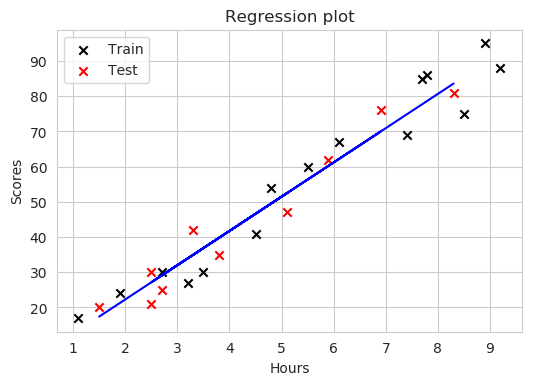

In [15]:
# Plot outputs
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(X_train, y_train, marker='x', color='black', label='Train')
plt.scatter(X_test, y_test, marker='x', color='red', label='Test')
plt.plot(X_test, y_pred, color='blue')
plt.title('Regression plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()